## CUSTOMER CONVERSION PREDICTION

In [36]:
## IMPORTING NECESSARY LIBRARIES ##

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
df=pd.read_csv('Customer Conversion Prediction - Customer Conversion Prediction.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


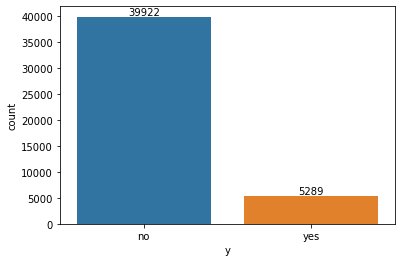

In [39]:
ax= sns.countplot(x='y',data=df,orient='v')
for container in ax.containers:
    ax.bar_label(container)

In [40]:
target_count=df.y.value_counts()
print('Class NO :',target_count[0])
print('Class Yes :',target_count[1])
print('Percenatge of no :',(100*target_count[0]/(target_count[1]+target_count[0])),'%')

Class NO : 39922
Class Yes : 5289
Percenatge of no : 88.30151954170445 %


In [41]:
## PERCENTAGE OF 'NO' IS AROUND 88% SUGGESTING THIS IS AN IMBALANCED DATASET ##

In [42]:
from sklearn import preprocessing ## IMPORTING PREPROCESSING PACKAGE ##

In [43]:
le=preprocessing.LabelEncoder() ## INITIALIZING LABEL ENCODER ##

In [44]:
df['y']=le.fit_transform(df['y']) ## LABEL ENCODING 'Y' COLUMN ##

In [45]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


### EXPLORATORY DATA ANALYSIS

In [46]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [47]:
df.shape

(45211, 11)

In [48]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int32
dtype: object

In [49]:
df.describe()

,age,day,dur,num_calls,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841,0.116985
std,10.618762,8.322476,257.527812,3.098021,0.321406
min,18.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,21.000000,319.000000,3.000000,0.000000
max,95.000000,31.000000,4918.000000,63.000000,1.000000


In [50]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [51]:
df.shape

(45211, 11)

In [52]:
df.corr()

,age,day,dur,num_calls,y
age,1.000000,-0.009120,-0.004648,0.004760,0.025155
day,-0.009120,1.000000,-0.030206,0.162490,-0.028348
dur,-0.004648,-0.030206,1.000000,-0.084570,0.394521
num_calls,0.004760,0.162490,-0.084570,1.000000,-0.073172
y,0.025155,-0.028348,0.394521,-0.073172,1.000000


In [53]:
df.drop_duplicates() 

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


In [54]:
df.shape

(45211, 11)

<Figure size 1800x864 with 0 Axes>

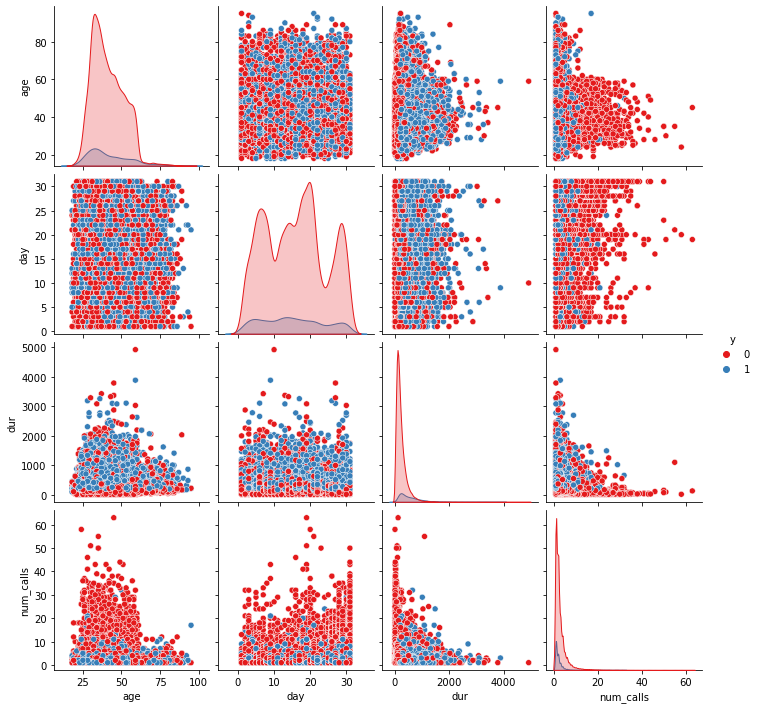

In [55]:
plt.figure(figsize=(25,12))
sns.pairplot(data=df,hue='y',palette='Set1')

<AxesSubplot:xlabel='age'>

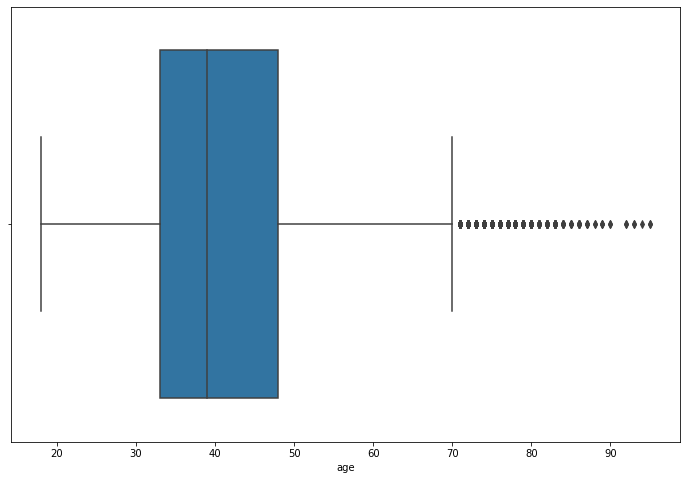

In [56]:
plt.figure(figsize=(12,8))
sns.boxplot(x='age',data=df)

<AxesSubplot:xlabel='age', ylabel='count'>

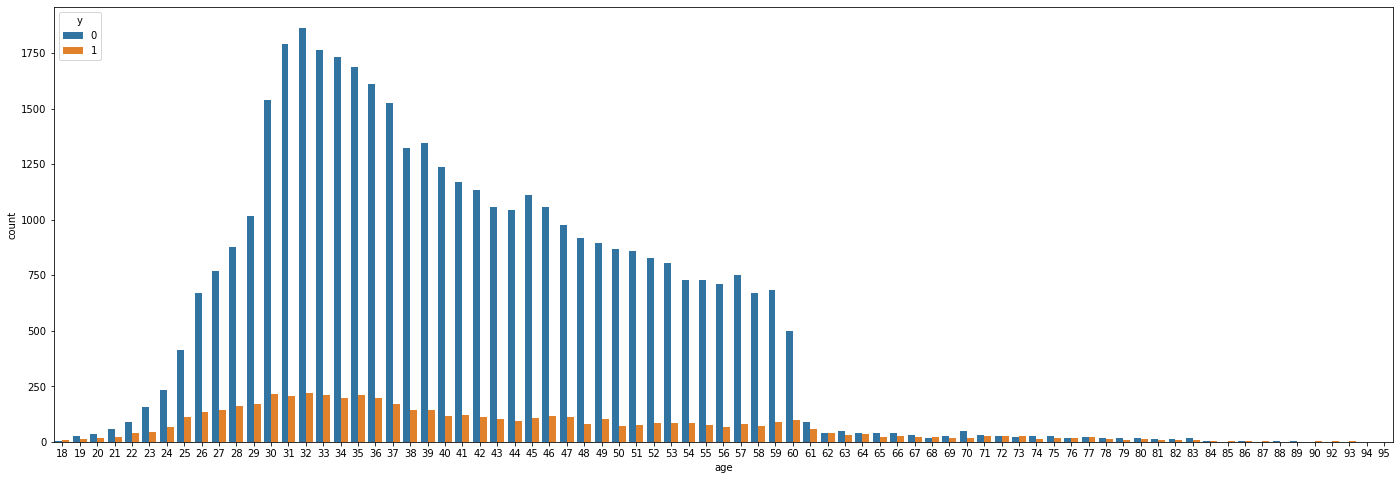

In [57]:
plt.figure(figsize=(24,8))
sns.countplot(x='age',hue='y',data=df)

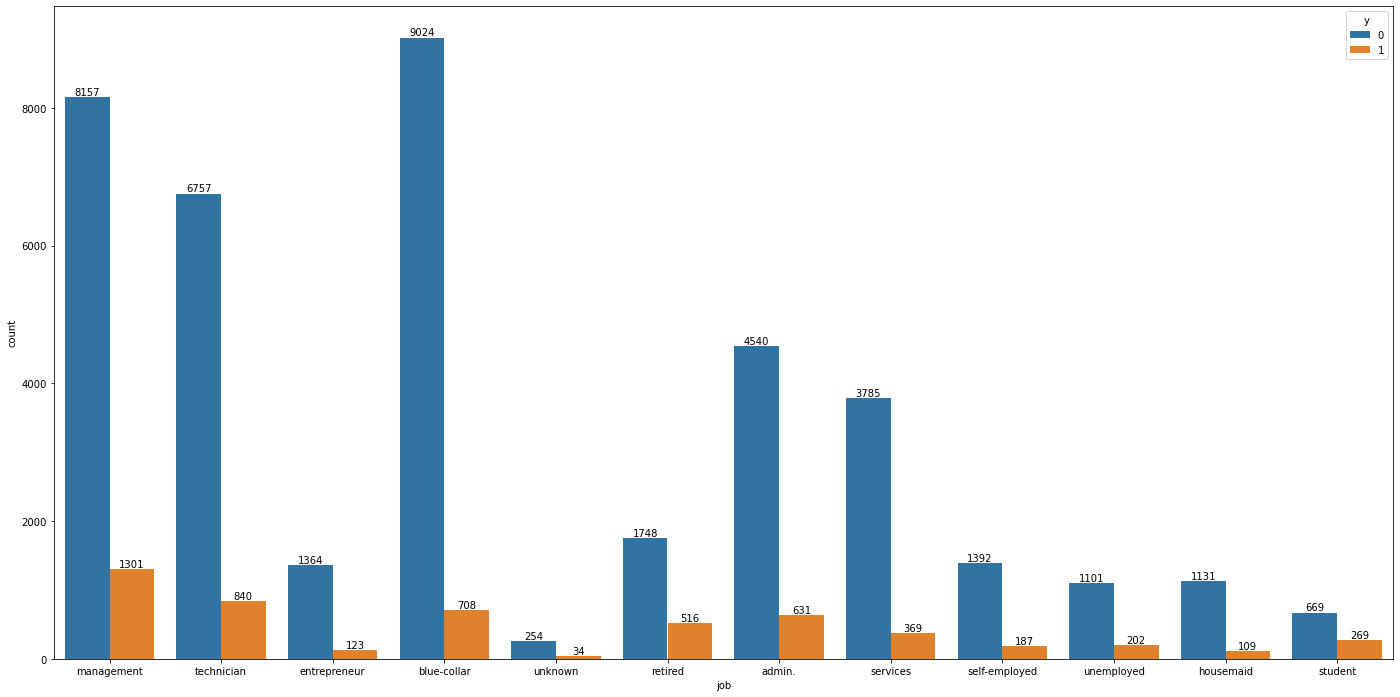

In [58]:
plt.figure(figsize=(24,12))
ax = sns.countplot(x='job', hue='y', data=df)
for container in ax.containers:
    ax.bar_label(container)

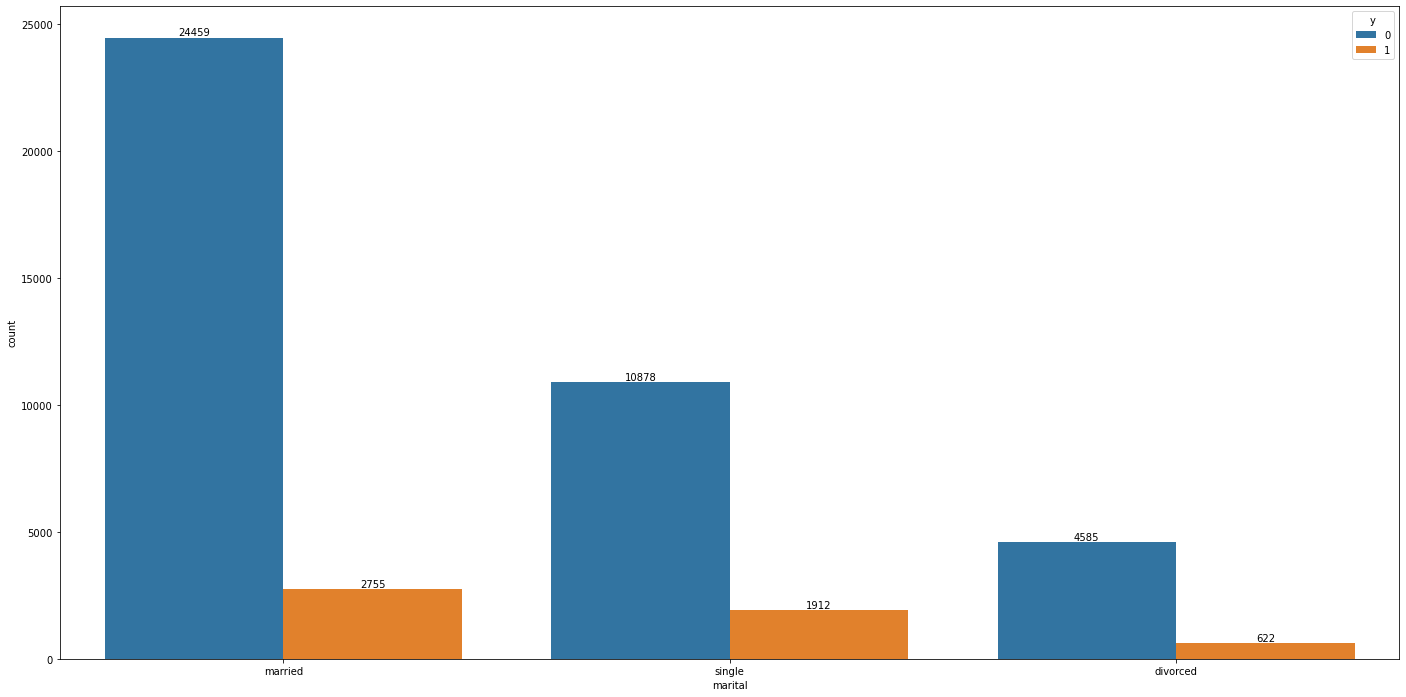

In [59]:
plt.figure(figsize=(24,12))
ax = sns.countplot(x='marital', hue='y', data=df)
for container in ax.containers:
    ax.bar_label(container)

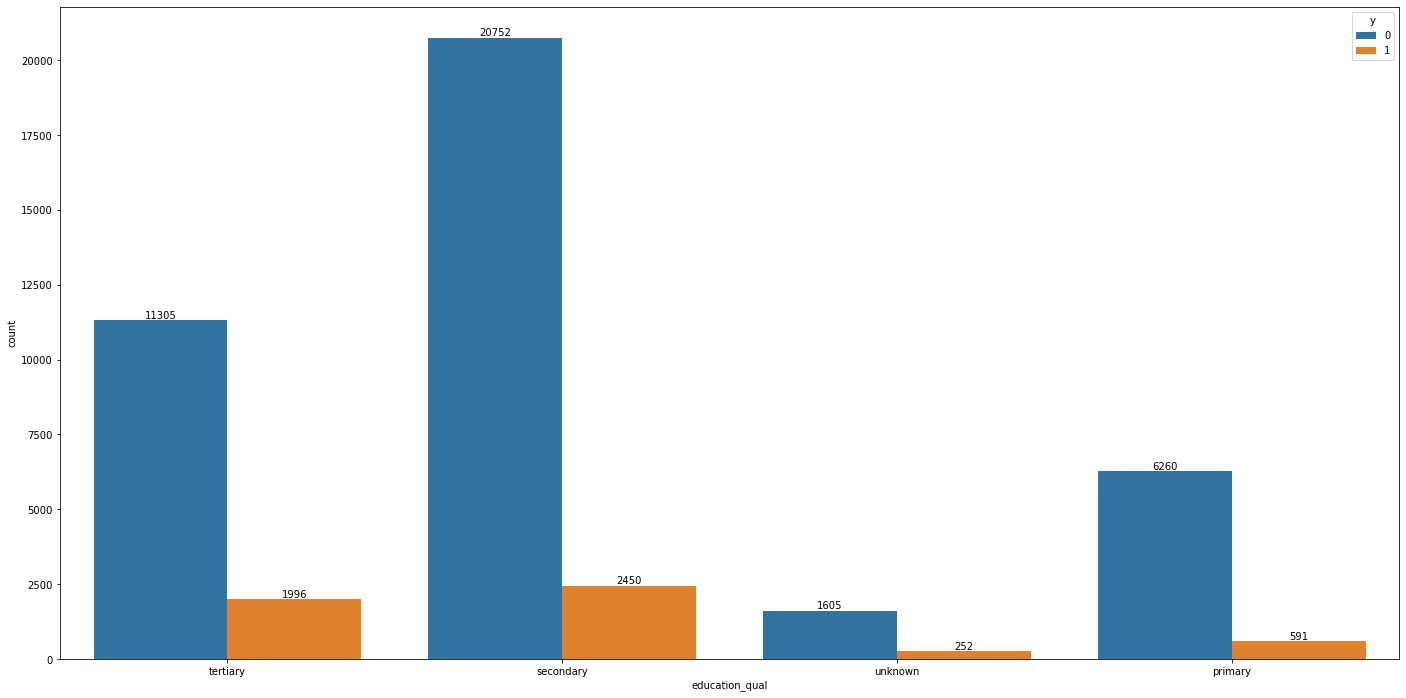

In [60]:
plt.figure(figsize=(24,12))
ax = sns.countplot(x='education_qual', hue='y', data=df)
for container in ax.containers:
    ax.bar_label(container)

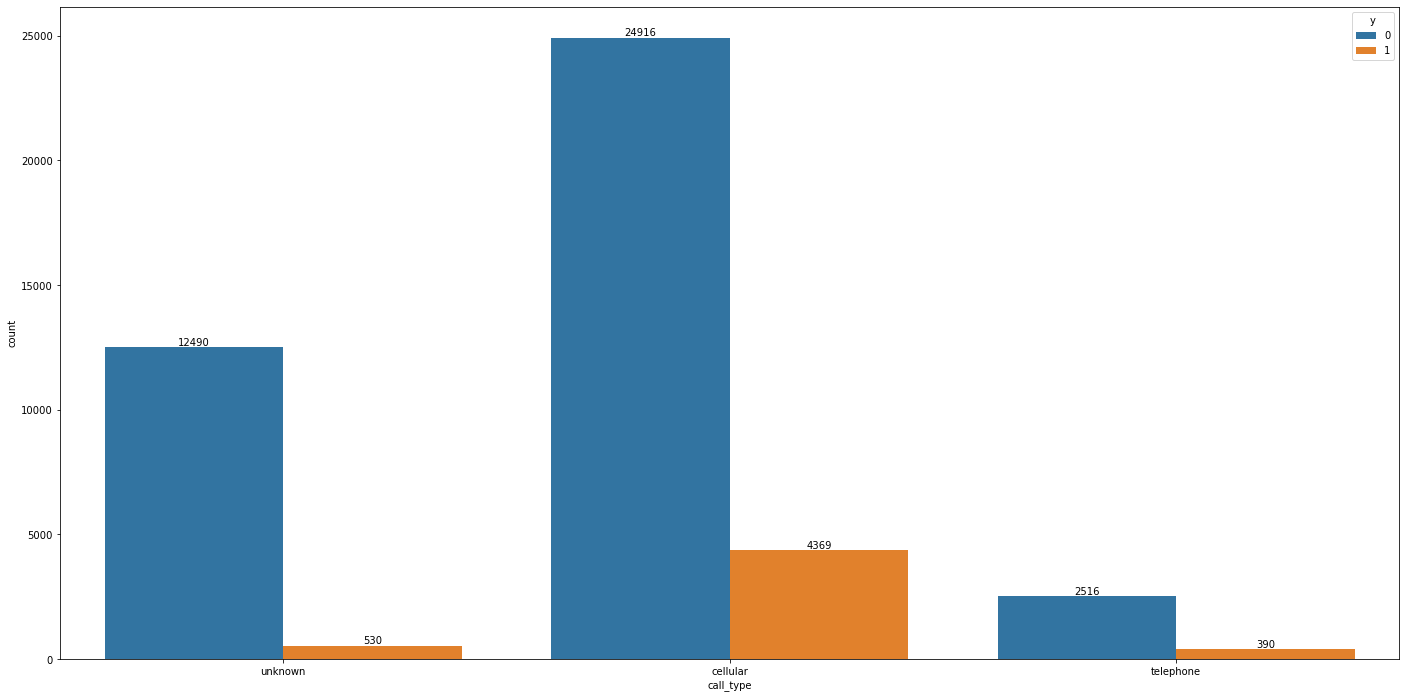

In [61]:
plt.figure(figsize=(24,12))
ax = sns.countplot(x='call_type', hue='y', data=df)
for container in ax.containers:
    ax.bar_label(container)

In [62]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [63]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [70]:
df.call_type.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [71]:
df.prev_outcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [64]:
df.education_qual = df.education_qual.map({'unknown':0,'primary':1,'secondary':2,'tertiary':3}) ## ENCODING EDUCATION COLUMN ##

In [65]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,3,unknown,5,may,261,1,unknown,0
1,44,technician,single,2,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,2,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,0,unknown,5,may,92,1,unknown,0
4,33,unknown,single,0,unknown,5,may,198,1,unknown,0


In [66]:
df=df.drop(columns=(['day','mon']),axis=1) ## CORR TO 'Y' OF THESE TWO COLUMNS ARE VERY LOW THEREFORE DROPPING THEM ##

In [67]:
df.head()

,age,job,marital,education_qual,call_type,dur,num_calls,prev_outcome,y
0,58,management,married,3,unknown,261,1,unknown,0
1,44,technician,single,2,unknown,151,1,unknown,0
2,33,entrepreneur,married,2,unknown,76,1,unknown,0
3,47,blue-collar,married,0,unknown,92,1,unknown,0
4,33,unknown,single,0,unknown,198,1,unknown,0


### ONE HOT ENCODING OF ALL THE CATEGORICAL FEATURES EXCEPT EDUCATION COLUMN ###

In [69]:
df1 = pd.get_dummies(df, columns = ['marital'])
df1 = pd.get_dummies(df1,columns=['job','call_type','prev_outcome'])
df1

,age,education_qual,dur,num_calls,y,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,...,job_technician,job_unemployed,job_unknown,call_type_cellular,call_type_telephone,call_type_unknown,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,3,261,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,44,2,151,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,33,2,76,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,47,0,92,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,33,0,198,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,977,3,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
45207,71,1,456,2,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,2,1127,5,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,2,508,4,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [72]:
from sklearn.model_selection import train_test_split ## SPLITING THE DATA FOR TRAINING THE MODEL ##

In [73]:
X = df1.drop('y',axis=1)
y = df1['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [74]:
from sklearn.tree import DecisionTreeClassifier ## SINCE THERE ARE MANY CATEGORICAL COLUMNS DECIDED TO USE DECISION TREE ALGO ##

In [75]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
predictions = dtree.predict(X_test)

In [81]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [78]:
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     11967
           1       0.37      0.41      0.39      1597

    accuracy                           0.85     13564
   macro avg       0.65      0.66      0.65     13564
weighted avg       0.86      0.85      0.85     13564



In [83]:
roc_auc_score(y_test,predictions) ## AUROC SCORE IS AROUND 0.67 WHICH SUGGESTS THE MODEL IS PERFORMING ON AVERAGE ##

0.6573173283511498

In [80]:
print(confusion_matrix(y_test,predictions)) ## ITS IS CLEARLY VISIBLE FROM CONFUSION MATRIX THAT THE ALGORITHM IS BIASED DUE TO IMBALANCED DATASET##

[[10869  1098]
 [  948   649]]


In [84]:
from sklearn.ensemble import RandomForestClassifier ## TRYING OUT RANDOM FOREST CLASSIFIER TO SEE WHETHER IT IMPROVES THE AUROC##

In [85]:
rfc = RandomForestClassifier(n_estimators=600)

In [86]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [87]:
pred_rfc = rfc.predict(X_test)

In [88]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11967
           1       0.57      0.38      0.45      1597

    accuracy                           0.89     13564
   macro avg       0.74      0.67      0.70     13564
weighted avg       0.88      0.89      0.88     13564



In [91]:
print(confusion_matrix(y_test,pred_rfc)) ## THE MODEL IS STILL BIASED ##

[[11503   464]
 [  994   603]]


In [92]:
roc_auc_score(y_test,pred_rfc) ## THE AUROC SCORE HAS IMPROVED BUT STILL THE PERFORMANCE IS AVERAGE ##

0.669404837421046

### SINCE THE DATASET IS IMBALANCED THE MODELS TRAINED ARE COMPLETELY BIASED THEREFORE BALANCING THE DATASET USING imblearn PACKAGE 

In [93]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
sm = SMOTE(sampling_strategy='minority', random_state=42) ## INITIATING SMOTE BY OVERSAMPLING THE MINORITY CLASS ##

In [97]:
oversampled_X, oversampled_Y = sm.fit_resample(X,y)

In [98]:
oversampled_df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [99]:
oversampled_df['y'].value_counts()

0    39922
1    39922
Name: y, dtype: int64

In [100]:
X_over = oversampled_df.drop('y',axis=1)
y_over = oversampled_df['y']
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.30, random_state=101)

In [102]:
rfc_over = RandomForestClassifier(n_estimators=600) ## INTIATING RANDOM FOREST CLASSIFIER FOR OVERSAMPLED DATAFRAME ##

In [104]:
rfc_over.fit(X_train_over,y_train_over)

RandomForestClassifier(n_estimators=600)

In [105]:
predict_over=rfc_over.predict(X_test_over)

In [106]:
print(classification_report(y_test_over,predict_over))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11956
           1       0.94      0.93      0.94     11998

    accuracy                           0.94     23954
   macro avg       0.94      0.94      0.94     23954
weighted avg       0.94      0.94      0.94     23954



In [108]:
print(confusion_matrix(y_test_over,predict_over)) ## THE MODEL IS NOT BIASED  ON THE OVERSAMPLED DATASET ##

[[11297   659]
 [  847 11151]]


In [110]:
roc_auc_score(y_test_over,predict_over) ## AUROC SCORE IS AROUND 0.937 WHICH SUGGESTS THE MODEL WORKS GOOD ON OVERSAMPLED DATASET##

0.9371430659988998

### EVALUATION OF THE TRAINED MODEL ON THE ORIGINAL DATASET

In [111]:
predict_original=rfc_over.predict(X_test)

In [112]:
print(classification_report(y_test,predict_original))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11967
           1       0.84      0.83      0.83      1597

    accuracy                           0.96     13564
   macro avg       0.91      0.90      0.91     13564
weighted avg       0.96      0.96      0.96     13564



In [113]:
print(confusion_matrix(y_test,predict_original)) ## THE MODEL IS NOT BIASED  ON THE ORIGINAL DATASET ##

[[11716   251]
 [  279  1318]]


In [114]:
roc_auc_score(y_test,predict_original) ## AUROC SCORE IS AROUND 0.9021 WHICH SUGGESTS THE MODEL WORKS GOOD ON ORIGINAL DATASET##

0.9021615432838971

### CONCLUSION :

In [1]:
## THUS THE customer coversion prediction of rfc_over model is higly accurate ## 

## THANK YOU